In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

There are 9 seperate files containg my extended streaming history that must be concatenated into one file. 

In [2]:
spotify = pd.read_json("endsong_0.json")
spotify_1 = pd.read_json("endsong_1.json")
spotify_2 = pd.read_json("endsong_2.json")
spotify_3 = pd.read_json("endsong_3.json")
spotify_4 = pd.read_json("endsong_4.json")
spotify_5 = pd.read_json("endsong_5.json")
spotify_6 = pd.read_json("endsong_6.json")
spotify_7 = pd.read_json("endsong_7.json")
spotify_8 = pd.read_json("endsong_8.json")

spotify_merge = pd.concat([spotify,spotify_1,spotify_2,spotify_3,spotify_4,spotify_5,spotify_6,spotify_7,spotify_8], ignore_index = True)
spotify_merge

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-11-03T15:26:24Z,ozrodriguez72,"Android OS 11 API 30 (Google, Pixel 3a)",219914,US,75.139.186.234,unknown,Nandemonaiya - movie ver.,RADWIMPS,Your Name.,...,None,None,None,trackdone,logout,True,NaN,False,1635902621588,False
1,2018-11-02T16:18:37Z,ozrodriguez72,"Android OS 8.1.0 API 27 (LGE, LM-Q710(FGN))",0,US,172.58.24.18,unknown,First Class,Rainbow Kitten Surprise,Seven + Mary,...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,1541175504442,False
2,2020-08-02T20:18:21Z,ozrodriguez72,"Android-tablet OS 7.1.1 API 25 (samsung, SM-T350)",845,US,47.145.238.96,unknown,Me Voy,Julieta Venegas,Limon Y Sal,...,None,None,None,trackdone,endplay,True,NaN,False,1596389555912,False
3,2021-04-06T18:26:06Z,ozrodriguez72,OS X 10.13.6 [x86 4],212473,US,68.189.138.237,unknown,Again (Your Lie in April - Ghibli Piano and Vi...,Seycara Orchestral,Again (Your Lie in April - Ghibli Piano and Vi...,...,None,None,None,trackdone,trackdone,False,NaN,False,1617733352639,False
4,2021-11-10T05:54:42Z,ozrodriguez72,Partner google cast_voice;Google_Home;;5.1.0--...,692,US,2600:6c54:7500:323:1453:efc3:fe8f:241f,Mozilla%2F5.0%20(X11;%20Linux%20armv7l)%20Appl...,Ruthless,The Marías,"Superclean, Vol. II",...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129009,2020-11-09T18:01:58Z,ozrodriguez72,"Android-tablet OS 7.1.1 API 25 (samsung, SM-T350)",209765,US,47.145.238.96,unknown,Favorito,Camilo,Por Primera Vez,...,NaN,NaN,NaN,trackdone,trackdone,True,NaN,False,1604944709730,False
129010,2018-05-29T14:47:58Z,ozrodriguez72,"Android OS 7.0 API 24 (LGE, LGMS210)",430,US,172.56.31.210,unknown,Straight into Your Arms - Bonus Track Version,Vance Joy,Dream Your Life Away,...,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1527605249143,False
129011,2019-02-15T00:25:44Z,ozrodriguez72,"Android OS 8.1.0 API 27 (LGE, LM-Q710(FGN))",216600,US,69.75.209.115,unknown,My Eyes,The Lumineers,Cleopatra,...,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1550190126272,False
129012,2021-05-04T22:20:41Z,ozrodriguez72,OS X 10.13.6 [x86 4],144253,US,68.189.138.237,unknown,prc,Kensuke Ushio,"A Shape of Light ""A Silent Voice the Movie"" Or...",...,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1620166696496,False


In [3]:
#How many times did I listen to this specific song
print(len(spotify_merge[spotify_merge["master_metadata_track_name"] == "踊り子"]))

472


In [4]:
# Group the DataFrame by track name and sum the ms_played column
song_play_counts = spotify_merge.groupby("master_metadata_track_name")["ms_played"].sum() / 60000

# Sort the play counts in descending order and display the top 10 songs
top_songs = song_play_counts.sort_values(ascending=False).head(10)
print(top_songs)

master_metadata_track_name
Hallucinogenics                 2962.043333
First Class                     2852.288850
Straight Razor                  2244.217733
Grave Digger                    2157.638650
Heavy                           2118.547017
Me and My Friends Are Lonely    1962.735667
Tribulation                     1912.727383
Cringe                          1890.527233
I Can't Go on Without You       1773.094583
踊り子                             1663.641000
Name: ms_played, dtype: float64


These are my top songs based on the time spent listening. Many of these songs came from 2018, which was suprising to me because I began to listen to music more frequently only recently. 

In [5]:
# filter only the rows where a song was played
songs_df = spotify_merge[spotify_merge["master_metadata_track_name"].notnull()]

# count the number of songs played
num_songs = songs_df.shape[0]

print(f"Total number of songs listened to on Spotify: {num_songs}")

Total number of songs listened to on Spotify: 128719


In [6]:
artist_counts = spotify_merge.groupby("master_metadata_album_artist_name")["master_metadata_track_name"].nunique().sort_values(ascending=False)


In [7]:
most_common_artist = artist_counts.index[0:100]
most_common_artist

Index(['Bad Bunny', 'Michael Bublé', 'Mon Laferte', 'Kensuke Ushio',
       'Pepe Aguilar', 'RADWIMPS', 'Hippo Campus', 'Eminem', 'Juan Gabriel',
       'Matt Maeson', 'Trombone Shorty', 'Daniela Andrade', 'Cuco',
       'Enrique Iglesias', 'Ben E. King', 'keshi', 'Shakira', 'Miguel Bosé',
       'The Lumineers', '88rising', 'AKMU', 'Twenty One Pilots',
       'Carlos Rivera', 'Caamp', 'George Ezra', 'The Marías', 'Eve',
       'Omar Apollo', 'Rainbow Kitten Surprise', 'Joji', 'Noah Kahan',
       'Carlos Vives', 'Leo Dan', 'Foo Fighters', 'The Beatles',
       'Portugal. The Man', 'Cumbias Viejitas', 'Lewis Capaldi', 'Bratty',
       'X Ambassadors', 'Bruno Mars', 'Javier Solís', 'YOASOBI',
       'Marco Antonio Solís', 'Neon Trees', 'boy pablo', 'Wallows', 'J Balvin',
       'Nicky Jam', 'Vicente Fernández', 'BIBI', 'Jon Bellion',
       'Natalia Lafourcade', 'Vaundy', 'Reik', 'Birdtalker', 'Mt. Joy',
       'Ezra Bell', 'Men I Trust', 'The Head And The Heart', 'Brooklyn Duo',
      

Total time spent listening to music on Spotify:

In [8]:
trackdone_spotify = spotify_merge[spotify_merge["reason_start"] == "trackdone"]

total_time = trackdone_spotify["ms_played"].sum() / 60000

print("Total time listening to music on spotify", total_time, " in minuets")

Total time listening to music on spotify 272584.25076666666  in minuets


The code above shows my total amount of time listening to music on Spotify, but only looks at the songs that began when the previous song ended completely. 

Now I will look at how my top songs and listening times differ per year. I expect to see changes in both listening time and genre preference. 

In [9]:
# find the earliest timestamp
earliest_timestamp = spotify_merge['ts'].min()

print(earliest_timestamp)

2014-10-19T17:45:28Z


In [10]:
# Convert "ts" column to datetime format
spotify_merge["ts"] = pd.to_datetime(spotify_merge["ts"])

# Create a new DataFrame for each year
df_2014 = spotify_merge[spotify_merge["ts"].dt.year == 2014]
df_2015 = spotify_merge[spotify_merge["ts"].dt.year == 2015]
df_2016 = spotify_merge[spotify_merge["ts"].dt.year == 2016]
df_2017 = spotify_merge[spotify_merge["ts"].dt.year == 2017]
df_2018 = spotify_merge[spotify_merge["ts"].dt.year == 2018]
df_2019 = spotify_merge[spotify_merge["ts"].dt.year == 2019]
df_2020 = spotify_merge[spotify_merge["ts"].dt.year == 2020]
df_2021 = spotify_merge[spotify_merge["ts"].dt.year == 2021]
df_2022 = spotify_merge[spotify_merge["ts"].dt.year == 2022]
df_2023 = spotify_merge[spotify_merge["ts"].dt.year == 2023]

In [11]:
# group the data by track name and sum the number of plays
song_counts = df_2014.groupby('master_metadata_track_name')['ms_played'].sum() / 60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2014 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2014)

master_metadata_track_name
So Far...         1.134667
Beautiful Pain    0.277833
Name: ms_played, dtype: float64


It appears that I listened to very little music in 2014. My spotify account was created in october of 2014, so I am suprised that there is only two entries. During this time, I prefered to listen to music on my Ipod rather than streaming services. 

In [12]:
# group the data by track name and sum the number of plays
song_counts = df_2015.groupby('master_metadata_track_name')['ms_played'].sum() / 60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2015 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2015)

Series([], Name: ms_played, dtype: float64)


In [13]:
# group the data by track name and sum the number of plays
song_counts = df_2016.groupby('master_metadata_track_name')['ms_played'].sum() / 60000

# sort the songs by play count in descending order and take the top 10
top_10_songs = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs)

master_metadata_track_name
Do To Me               85.419283
Buckjump               77.544467
Backatown              57.744050
Encore                 54.707033
Shortyville            53.683550
Hurricane Season       51.428967
Long Weekend           50.011483
The Craziest Thing     43.301483
Fire And Brimstone     41.376000
Something Beautiful    38.422383
Name: ms_played, dtype: float64


2016 was the year were my music taste began to expand. I started listening to music more frequently and listend to a lot of Jazz and Funk. Most, if not all, of these songs are from the artist named Trombone Shorty. I had just joined Jazz band as a Trombone player and was obsessed with the sound. 

In [14]:
# group the data by track name and sum the number of plays
song_counts = df_2017.groupby('master_metadata_track_name')['ms_played'].sum() / 60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2017 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2017)

master_metadata_track_name
I Can't Go on Without You    906.737550
Feel It Still                715.852500
Vor í Vaglaskógi             699.495350
Save Yourself                684.190333
No Good                      611.311200
All the Pretty Girls         579.931267
Broken Bones                 564.852033
Way down We Go               551.970100
Glass House                  508.086350
Hot Blood                    483.545867
Name: ms_played, dtype: float64


In 2017, there was a shift from Jazz and Funk to Rock and Roll. Once again, in this year I show loyalty to a band named KALEO. This is something that is common in my listening patterns. Furthermore, my total time spent listening increased dramatically from 2016-2017. 

In [15]:
# group the data by track name and sum the number of plays
song_counts = df_2018.groupby('master_metadata_track_name')['ms_played'].sum() /60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2018 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2018)

master_metadata_track_name
First Class                     2679.490450
Hallucinogenics                 2108.310833
Straight Razor                  1616.052517
Grave Digger                    1380.017550
Me and My Friends Are Lonely    1307.673800
Tribulation                     1198.123083
Unconditional                   1158.773667
The Hearse                      1152.557417
Cringe                          1123.975600
Mr. Rattlebone                  1110.712883
Name: ms_played, dtype: float64


2018 was a big year for my listening time. These were the highest listening times out of any year. As stated before I have shown patterns to stick to one artist. This time around I listened to a lot of Matt Maeson because he had just released a ne EP. In addition, I began to bike around my home town on hours and took advantage of that time by listening to music. It is important to consider that these were the only songs that I was listening to, which explains the inflation of the numbers. If I were to compare this to other songs of this year there would be high drop off. 

In [16]:
# group the data by track name and sum the number of plays
song_counts = df_2019.groupby('master_metadata_track_name')['ms_played'].sum() /60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2019 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2019)

master_metadata_track_name
Riptide                795.037283
Mess                   753.040217
So Long, Honey         710.826533
Fly Away With Me       646.898383
Misty                  560.471317
Young Blood            507.290167
Bruises                487.907400
All the Debts I Owe    484.293033
Cringe                 483.532817
Hallucinogenics        451.652733
Name: ms_played, dtype: float64


2019 is where we see more diversity within my listening habits. There is a more equal distribution of listen times, as well as genre and artists. During this time I joined a band with my friends which exposed me to many different songs. This expanded my music taste and allowed me to explore that further. 

In [17]:
# group the data by track name and sum the number of plays
song_counts = df_2020.groupby('master_metadata_track_name')['ms_played'].sum() / 60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2020 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2020)

master_metadata_track_name
prom dress                                       691.722067
Gallo Pinto                                      657.696933
Howl's Moving Castle Theme                       645.558817
Mi Buen Amor                                     583.586500
Sparkle (From "Kimi No Na Wa") - Instrumental    572.856300
LA CANCIÓN                                       564.182067
Amárrame                                         492.389633
Clandestino                                      454.154250
Callaita                                         448.617283
dreamy night                                     441.311400
Name: ms_played, dtype: float64


In 2020, I had just finished my first semester of college and was realizing that I was missing the music that I grew up with. I felt homesick and wanted to reconnect with my family and background by listening to more music in Spanish. This would influence my future listening habits as I would continue to branch out be listening to music in different languages. 

In [18]:
# group the data by track name and sum the number of plays
song_counts = df_2021.groupby('master_metadata_track_name')['ms_played'].sum() / 60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2021 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2021)

master_metadata_track_name
Ao No Waltz                   913.221733
Re:Re:                        843.954500
Heavy                         648.595483
Nandemonaiya - movie ver.     570.056333
Sparkle - movie ver.          517.808017
Yonaguni                      512.913633
Your Lie in April - Medley    481.410600
Monsoon                       463.724350
All I Really Want Is You      461.048250
Kuchikamizake trip            457.213150
Name: ms_played, dtype: float64


In 2021, I beagn to listen to a lot more music in Japanese, specifically from the sound track of the popular film "Your Name". I began to listen to a lot more soundtracks because of COVID, I needed something to keep me focused on school work and the upbeat music that I used to listen to didn't fit. 

In [19]:
# group the data by track name and sum the number of plays
song_counts = df_2022.groupby('master_metadata_track_name')['ms_played'].sum() / 60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2022 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2022)

master_metadata_track_name
踊り子               1516.251100
Lover Is a Day     818.732650
Cariño             637.774150
Clueless           630.984950
Heavy              595.341117
Care For You       487.042267
Otro Atardecer     481.439450
Talk to Her        454.626700
LA CANCIÓN         447.678833
ABQ                445.863567
Name: ms_played, dtype: float64


In 2022, life began to turn back to normal and my music remained more laid back but was more exciting than the soundtracks I had been listening to. I also studied abroad in Korea during this time, so there was a lot of time spent exploring with headphones on. In addition, there was a lot of exposure to new music in Japanes and Korean. 

In [20]:
# group the data by track name and sum the number of plays
song_counts = df_2023.groupby('master_metadata_track_name')['ms_played'].sum() / 60000

# sort the songs by play count in descending order and take the top 10
top_10_songs_2023 = song_counts.sort_values(ascending=False)[:10]

# print the top 10 songs
print(top_10_songs_2023)

master_metadata_track_name
踊り子                                     147.389900
The Weekend - MILLI Remix               109.102900
Lover Is a Day                           97.612167
Never Learned To Dance                   95.677867
Anna Sun                                 95.670950
Tictoc Tictoc Tictoc (with Beenzino)     94.938367
Questioning My Mind                      86.135550
Matsuri                                  78.826567
Shinunoga E-Wa                           77.922100
Un Coco                                  77.797217
Name: ms_played, dtype: float64


2023 shows the impact of my study abroad experience. Within my top 10 songs, the languages consist of Korean, Japanese, Spanish, and English. 

C:\Users\ozrod\AppData\Local\Temp\ipykernel_24688\1417745724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['month'] = df_2018['ts'].dt.strftime('%Y-%m')


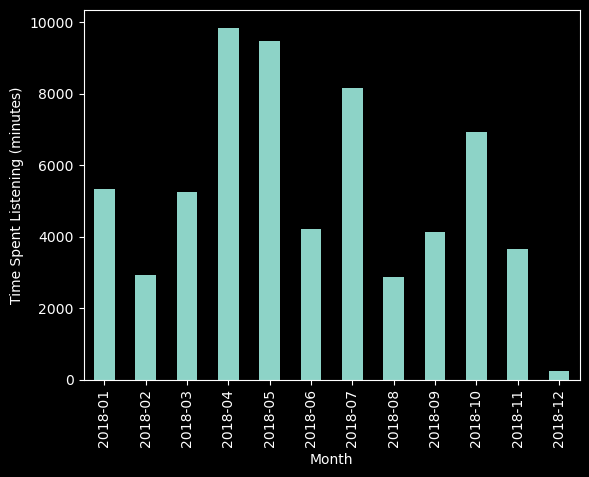

In [45]:
# Add a column for the month
df_2018['month'] = df_2018['ts'].dt.strftime('%Y-%m')

# Filter the DataFrame to only include music streams
music_df = df_2018[df_2018['master_metadata_track_name'].notnull()]

# Calculate the total time spent listening to music each month
time_by_month = music_df.groupby('month')['ms_played'].sum() / (1000*60) # Convert milliseconds to minutes


# Create a bar chart of the total time spent listening to music each month
time_by_month_2018 = time_by_month.plot(kind='bar')

# Set the x-axis label
time_by_month_2018.set_xlabel('Month')

# Set the y-axis label
time_by_month_2018.set_ylabel('Time Spent Listening (minutes)')

# Show the plot
plt.show()

In 2018, the month with the highest listening times were April and May. As stated before, I spent a lot of time on my bike during this time. My prediction is that this is when it began to be a comfortable temperature to ride around and once it hit June it began to get too hot to be outside. 

C:\Users\ozrod\AppData\Local\Temp\ipykernel_24688\3990096734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['month'] = df_2019['ts'].dt.strftime('%Y-%m')


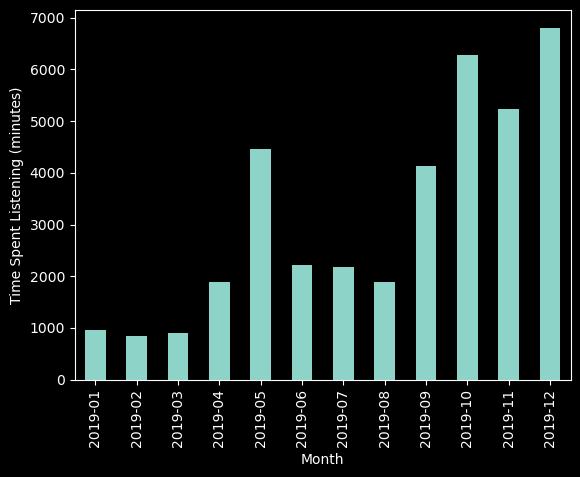

In [44]:
# Add a column for the month
df_2019['month'] = df_2019['ts'].dt.strftime('%Y-%m')

# Filter the DataFrame to only include music streams
music_df = df_2019[df_2019['master_metadata_track_name'].notnull()]

# Calculate the total time spent listening to music each month
time_by_month = music_df.groupby('month')['ms_played'].sum() / (1000*60) # Convert milliseconds to minutes


# Create a bar chart of the total time spent listening to music each month
time_by_month_2019 = time_by_month.plot(kind='bar')

# Set the x-axis label
time_by_month_2019.set_xlabel('Month')

# Set the y-axis label
time_by_month_2019.set_ylabel('Time Spent Listening (minutes)')

# Show the plot
plt.show()

2019 was a slow start for my listening times per month, this is most likely because I was in my last year of high school and spent most of my time with my friends. Starting in September, I began to listen to music more frequently. This is most likely because I started my first semester in college and had a lot more time by myself. I would listen to music while cleaning, working out, or walking to class. 

C:\Users\ozrod\AppData\Local\Temp\ipykernel_24688\3063105790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['month'] = df_2020['ts'].dt.strftime('%Y-%m')


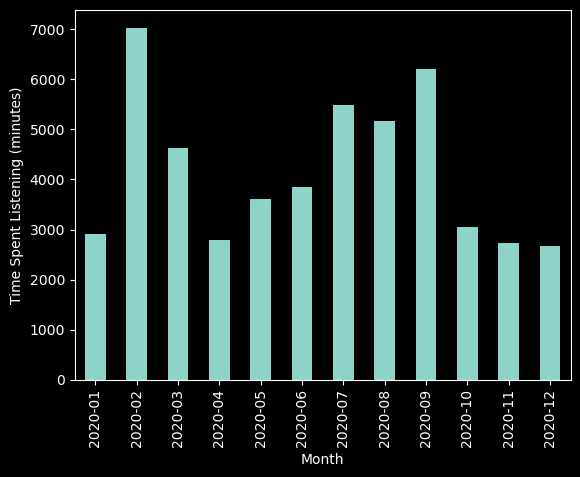

In [23]:
# Add a column for the month
df_2020['month'] = df_2020['ts'].dt.strftime('%Y-%m')

# Filter the DataFrame to only include music streams
music_df = df_2020[df_2020['master_metadata_track_name'].notnull()]

# Calculate the total time spent listening to music each month
time_by_month = music_df.groupby('month')['ms_played'].sum() / (1000*60) # Convert milliseconds to minutes


# Create a bar chart of the total time spent listening to music each month
time_by_month_2020 = time_by_month.plot(kind='bar')

# Set the x-axis label
time_by_month_2020.set_xlabel('Month')

# Set the y-axis label
time_by_month_2020.set_ylabel('Time Spent Listening (minutes)')

# Show the plot
plt.show()

In 2020, I was stuck at home due to the pandemic and needed to have some sort of background music to keep me focused and happy. During this year, I began to listen to a lot more soundtracks or instrumental versions of songs. These tracks were very good to have playing at all times, even when I was not actively listening. 

C:\Users\ozrod\AppData\Local\Temp\ipykernel_24688\4229095522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['month'] = df_2021['ts'].dt.strftime('%Y-%m')


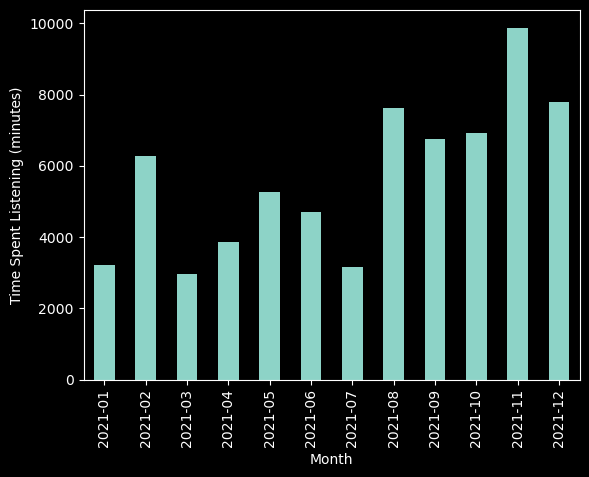

In [24]:
# Add a column for the month
df_2021['month'] = df_2021['ts'].dt.strftime('%Y-%m')

# Filter the DataFrame to only include music streams
music_df = df_2021[df_2021['master_metadata_track_name'].notnull()]

# Calculate the total time spent listening to music each month
time_by_month = music_df.groupby('month')['ms_played'].sum() / (1000*60) # Convert milliseconds to minutes


# Create a bar chart of the total time spent listening to music each month
time_by_month_2021 = time_by_month.plot(kind='bar')

# Set the x-axis label
time_by_month_2021.set_xlabel('Month')

# Set the y-axis label
time_by_month_2021.set_ylabel('Time Spent Listening (minutes)')

# Show the plot
plt.show()

2021 was when my time spent listening to music began to match my numbers in 2018. I think this is because I finally found the music that I actually enjoy. I began to listen to a lot of music in spanish and that slowly made me explore other languages as well. 

C:\Users\ozrod\AppData\Local\Temp\ipykernel_24688\2449611560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['month'] = df_2022['ts'].dt.strftime('%Y-%m')


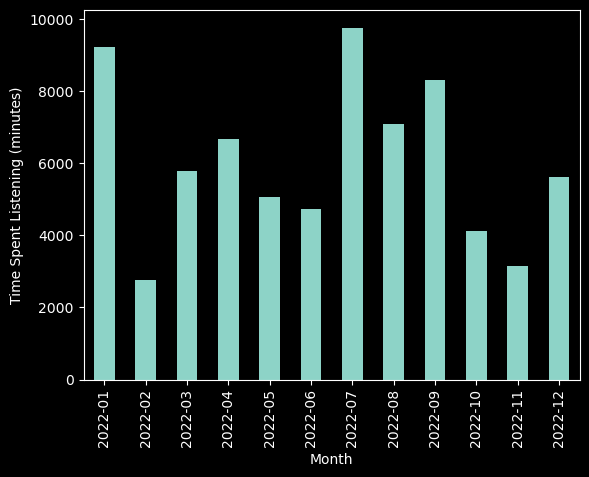

In [25]:
# Add a column for the month
df_2022['month'] = df_2022['ts'].dt.strftime('%Y-%m')

# Filter the DataFrame to only include music streams
music_df = df_2022[df_2022['master_metadata_track_name'].notnull()]

# Calculate the total time spent listening to music each month
time_by_month = music_df.groupby('month')['ms_played'].sum() / (1000*60) # Convert milliseconds to minutes


# Create a bar chart of the total time spent listening to music each month
time_by_month_2022 = time_by_month.plot(kind='bar')

# Set the x-axis label
time_by_month_2022.set_xlabel('Month')

# Set the y-axis label
time_by_month_2022.set_ylabel('Time Spent Listening (minutes)')

# Show the plot
plt.show()

2022 is a year where I had a lot of time to explore and just listen to music. When I came back from abroad, I used music to relive that experience which is why there is an increase during the summer. 

C:\Users\ozrod\AppData\Local\Temp\ipykernel_24688\1327467718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['month'] = df_2023['ts'].dt.strftime('%Y-%m')


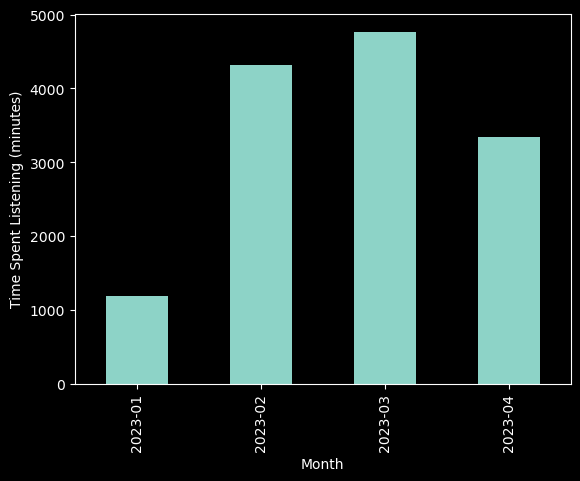

In [26]:
# Add a column for the month
df_2023['month'] = df_2023['ts'].dt.strftime('%Y-%m')

# Filter the DataFrame to only include music streams
music_df = df_2023[df_2023['master_metadata_track_name'].notnull()]

# Calculate the total time spent listening to music each month
time_by_month = music_df.groupby('month')['ms_played'].sum() / (1000*60) # Convert milliseconds to minutes


# Create a bar chart of the total time spent listening to music each month
time_by_month_2023 = time_by_month.plot(kind='bar')

# Set the x-axis label
time_by_month_2023.set_xlabel('Month')

# Set the y-axis label
time_by_month_2023.set_ylabel('Time Spent Listening (minutes)')

# Show the plot
plt.show()

2023 is an incomplete year but I expect it to be similar to that of 2022.

Deep Dive into my Favorite Song. 

In [27]:
USA_list = [] # Initialize an empty list to keep track of conn_country values
KR_list = []
for index, row in spotify_merge.iterrows():
    if row["master_metadata_track_name"] == "踊り子":
        if row["conn_country"] == "US":
            USA_list.append(row["conn_country"]) 
        if row["conn_country"] == "KR":
            KR_list.append(row["conn_country"]) 

print(len(KR_list) , len(USA_list)) 
        


141 331


In [29]:
odoriko_location = spotify_merge[spotify_merge["master_metadata_track_name"] == '踊り子']


In [30]:
odoriko_location

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
42,2023-03-11 06:33:03+00:00,ozrodriguez72,android,230109,US,71.81.187.144,unknown,踊り子,Vaundy,踊り子,...,None,None,None,clickrow,trackdone,True,0.0,False,1678516156,False
238,2022-06-03 06:07:46+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",454593,KR,223.62.163.79,unknown,踊り子,Vaundy,踊り子,...,None,None,None,clickrow,trackdone,True,NaN,False,1654236010271,False
345,2022-06-13 15:33:01+00:00,ozrodriguez72,"iOS 15.5 (iPad7,5)",230109,US,173.239.198.49,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,NaN,False,1655134149737,False
469,2022-04-12 10:20:31+00:00,ozrodriguez72,Windows 10 (10.0.22000; x64; AppX),230109,KR,218.144.183.226,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,False,NaN,False,1649758600950,False
504,2022-04-08 05:09:19+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",230109,US,216.73.163.77,unknown,踊り子,Vaundy,踊り子,...,None,None,None,clickrow,trackdone,True,NaN,False,1649394329069,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,2022-05-22 01:20:13+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",416966,KR,1.216.199.188,unknown,踊り子,Vaundy,踊り子,...,NaN,NaN,NaN,backbtn,trackdone,True,NaN,True,1653181995990,False
128092,2022-04-05 05:55:33+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",64604,US,216.73.163.51,unknown,踊り子,Vaundy,踊り子,...,NaN,NaN,NaN,appload,remote,False,NaN,False,1649138065562,False
128131,2022-09-25 05:25:16+00:00,ozrodriguez72,Partner google cast_voice;Google_Home_Mini;;5....,224253,US,2600:6c54:7500:fb6:581:7efc:32b9:d2df,None,踊り子,Vaundy,踊り子,...,NaN,NaN,NaN,remote,trackdone,True,NaN,False,0,False
128377,2022-04-10 06:44:51+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",144889,US,216.73.163.60,unknown,踊り子,Vaundy,踊り子,...,NaN,NaN,NaN,trackdone,logout,True,NaN,False,1649567183548,False


In [31]:
odoriko_kr = odoriko_location[odoriko_location['conn_country'] == 'KR']
odoriko_us = odoriko_location[odoriko_location['conn_country'] == 'US']

In [32]:
odoriko_kr

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
238,2022-06-03 06:07:46+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",454593,KR,223.62.163.79,unknown,踊り子,Vaundy,踊り子,...,None,None,None,clickrow,trackdone,True,NaN,False,1654236010271,False
469,2022-04-12 10:20:31+00:00,ozrodriguez72,Windows 10 (10.0.22000; x64; AppX),230109,KR,218.144.183.226,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,False,NaN,False,1649758600950,False
1316,2022-04-06 05:30:00+00:00,ozrodriguez72,Windows 10 (10.0.22000; x64; AppX),230109,KR,183.96.161.237,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,NaN,False,1649222769880,False
2080,2022-06-01 13:11:58+00:00,ozrodriguez72,"iOS 15.5 (iPad7,5)",1277,KR,165.132.5.137,unknown,踊り子,Vaundy,踊り子,...,None,None,None,clickrow,unexpected-exit-while-paused,True,NaN,False,1653987042042,False
2120,2022-04-06 01:29:51+00:00,ozrodriguez72,Windows 10 (10.0.22000; x64; AppX),230109,KR,165.132.5.146,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,NaN,False,1649208361112,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124033,2022-04-05 13:38:21+00:00,ozrodriguez72,Windows 10 (10.0.22000; x64; AppX),230109,KR,165.132.5.146,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,NaN,False,1649165670369,False
125268,2022-04-05 13:53:43+00:00,ozrodriguez72,Windows 10 (10.0.22000; x64; AppX),230109,KR,165.132.5.146,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,NaN,False,1649166592848,False
125718,2022-04-06 05:22:19+00:00,ozrodriguez72,Windows 10 (10.0.22000; x64; AppX),230109,KR,183.96.161.237,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,NaN,False,1649222308659,False
126505,2022-04-14 11:21:41+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",1338,KR,1.216.224.88,unknown,踊り子,Vaundy,踊り子,...,None,None,None,clickrow,endplay,False,NaN,True,1649935086641,False


In [33]:
odoriko_us

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
42,2023-03-11 06:33:03+00:00,ozrodriguez72,android,230109,US,71.81.187.144,unknown,踊り子,Vaundy,踊り子,...,None,None,None,clickrow,trackdone,True,0.0,False,1678516156,False
345,2022-06-13 15:33:01+00:00,ozrodriguez72,"iOS 15.5 (iPad7,5)",230109,US,173.239.198.49,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,NaN,False,1655134149737,False
504,2022-04-08 05:09:19+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",230109,US,216.73.163.77,unknown,踊り子,Vaundy,踊り子,...,None,None,None,clickrow,trackdone,True,NaN,False,1649394329069,False
885,2023-02-25 03:03:00+00:00,ozrodriguez72,android,323684,US,172.58.45.36,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,0.0,False,1677293804,False
2264,2022-11-21 00:57:36+00:00,ozrodriguez72,android,39058,US,71.94.189.226,unknown,踊り子,Vaundy,踊り子,...,None,None,None,remote,endplay,True,1.0,False,1668992219,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127787,2022-09-28 03:42:52+00:00,ozrodriguez72,Windows 10 (10.0.22000; x64; AppX),230109,US,107.191.235.254,unknown,踊り子,Vaundy,踊り子,...,None,None,None,trackdone,trackdone,True,NaN,False,1664336342855,False
128092,2022-04-05 05:55:33+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",64604,US,216.73.163.51,unknown,踊り子,Vaundy,踊り子,...,NaN,NaN,NaN,appload,remote,False,NaN,False,1649138065562,False
128131,2022-09-25 05:25:16+00:00,ozrodriguez72,Partner google cast_voice;Google_Home_Mini;;5....,224253,US,2600:6c54:7500:fb6:581:7efc:32b9:d2df,None,踊り子,Vaundy,踊り子,...,NaN,NaN,NaN,remote,trackdone,True,NaN,False,0,False
128377,2022-04-10 06:44:51+00:00,ozrodriguez72,"Android OS 12 API 32 (Google, Pixel 3a)",144889,US,216.73.163.60,unknown,踊り子,Vaundy,踊り子,...,NaN,NaN,NaN,trackdone,logout,True,NaN,False,1649567183548,False


Text(0.5, 1.0, 'Track Play Counts by Country')

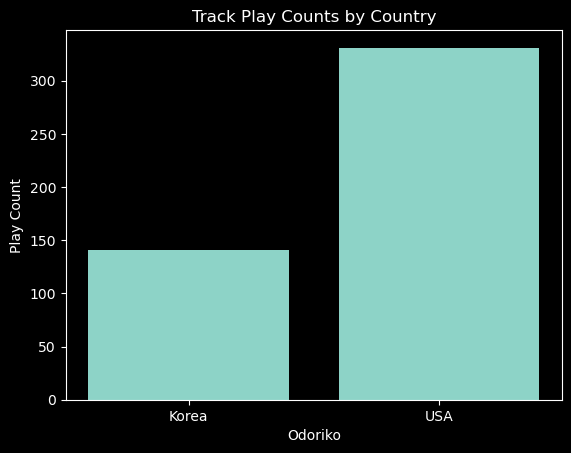

In [43]:
x_axis = ['Korea', 'USA']
y_value = [len(odoriko_kr), len(odoriko_us)]


plt.bar(x_axis , y_value)
plt.xlabel('Odoriko')
plt.ylabel('Play Count')
plt.title('Track Play Counts by Country')

I wanted to look at the distribution of listens for my favorite song. I discovered it when I was in Korea so I was interested to see how many times I had listened to it in each country. I listened to Odoriko 141 times in Korea and 331 times in the US. This was not suprising because I have now had more time in the US than in Korea. 

C:\Users\ozrod\AppData\Local\Temp\ipykernel_24688\1688570075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odoriko_location['month'] = odoriko_location['ts'].dt.strftime('%Y-%m')


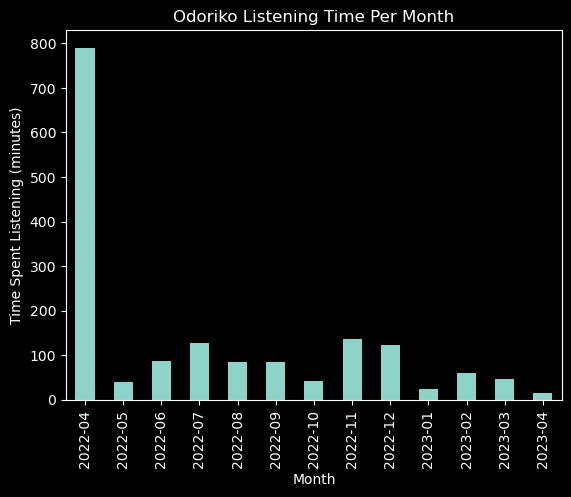

In [36]:
# Add a column for the month
odoriko_location['month'] = odoriko_location['ts'].dt.strftime('%Y-%m')

# Filter the DataFrame to only include music streams
music_df = odoriko_location[odoriko_location['master_metadata_track_name'].notnull()]

# Calculate the total time spent listening to music each month
time_by_month = music_df.groupby('month')['ms_played'].sum() / (1000*60) # Convert milliseconds to minutes


# Create a bar chart of the total time spent listening to music each month
time_by_month_odoriko = time_by_month.plot(kind='bar')

# Set the x-axis label
time_by_month_odoriko.set_xlabel('Month')

# Set the y-axis label
time_by_month_odoriko.set_ylabel('Time Spent Listening (minutes)')

#Set the title
time_by_month_odoriko.set_title('Odoriko Listening Time Per Month')

# Show the plot
plt.show()

This was very interesting to me. In the first month of discovering this song, I listened to it for almost 800 hours. However this does not match the amount of times that I listened to it in Korea. My guess is that I restarted the song before Spotify could detect that the track had finished.